Student name: Truong Giang Vu

Student number: 10174611


Our data set is about a list of movies along with their information such as studio, opening gross, total gross, released date, etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data from file 'file.csv' 
data = pd.read_csv('file.csv')

# Preview the first 5 lines of the loaded data 
data.head()

,Unnamed: 0,Row,Rank,Title,Studio,Opening($),% of Total,Theatres,Average($),Total Gross($),Release Year,Release Month,Release Date
0,0,1,2,Star Wars: The Force Awakens,BV,247966675,26.5,4134,59982,936662225,2015.0,12.0,18.0
1,1,3,6,Black Panther,BV,202003951,28.9,4020,50250,700059566,2018.0,2.0,16.0
2,2,5,4,Jurassic World,Uni.,208806270,32.0,4274,48855,652270625,2015.0,6.0,12.0
3,3,7,3,Star Wars: The Last Jedi,BV,220009584,35.5,4232,51987,620181382,2017.0,12.0,15.0
4,4,9,585,Titanic,Par.,28638131,4.8,2674,10710,600788188,1997.0,12.0,19.0


In [2]:
#Remove the useless columns
data = data.drop(['Unnamed: 0', 'Row', 'Rank'], axis=1)

#Remove all Null rows
data = data.dropna()

#Make sure that data does not have Null rows
data[pd.isnull(data).any(axis=1)]

,Title,Studio,Opening($),% of Total,Theatres,Average($),Total Gross($),Release Year,Release Month,Release Date


In [3]:
#Display data types
data.describe()

,Opening($),% of Total,Theatres,Average($),Total Gross($),Release Year,Release Month,Release Date
count,5.014000e+03,5014.000000,5014.000000,5014.000000,5.014000e+03,5014.000000,5014.000000,5014.000000
mean,1.393700e+07,31.689729,2057.729757,5555.667930,5.097575e+07,2001.914440,6.588552,16.077184
std,2.020663e+07,12.659785,972.579632,5047.556396,6.827825e+07,10.370556,3.431824,8.548393
min,8.534900e+04,1.200000,600.000000,128.000000,1.312000e+05,1975.000000,1.000000,1.000000
25%,3.583382e+06,23.100000,1195.000000,2635.750000,1.243088e+07,1994.000000,4.000000,9.000000
50%,7.514947e+06,31.700000,2007.500000,4167.000000,2.857783e+07,2003.000000,7.000000,16.000000
75%,1.600709e+07,39.875000,2824.000000,6718.750000,6.051513e+07,2011.000000,10.000000,23.000000
max,2.576982e+08,100.000000,4529.000000,59982.000000,9.366622e+08,2019.000000,12.000000,31.000000


In [4]:
#Convert year, month and date column to int
float_col = ['Release Year', 'Release Month', 'Release Date']
for col in float_col:
    data[col] = data[col].astype('int64')

#Combine 3 columns to one single release day
from datetime import datetime
data['Release Day'] = data.apply(lambda x:
                                 datetime.strptime("{0} {1} {2}".format(x['Release Year'],
                                                                        x['Release Month'],
                                                                        x['Release Date']), 
                                                   "%Y %m %d"),
                                 axis=1)
    
data.head()
#data.dtypes

,Title,Studio,Opening($),% of Total,Theatres,Average($),Total Gross($),Release Year,Release Month,Release Date,Release Day
0,Star Wars: The Force Awakens,BV,247966675,26.5,4134,59982,936662225,2015,12,18,2015-12-18
1,Black Panther,BV,202003951,28.9,4020,50250,700059566,2018,2,16,2018-02-16
2,Jurassic World,Uni.,208806270,32.0,4274,48855,652270625,2015,6,12,2015-06-12
3,Star Wars: The Last Jedi,BV,220009584,35.5,4232,51987,620181382,2017,12,15,2017-12-15
4,Titanic,Par.,28638131,4.8,2674,10710,600788188,1997,12,19,1997-12-19


In [5]:
#Top 10 movies have highest Total Gross 
data.sort_values(by=['Total Gross($)'], ascending=False).head(10)

,Title,Studio,Opening($),% of Total,Theatres,Average($),Total Gross($),Release Year,Release Month,Release Date,Release Day
0,Star Wars: The Force Awakens,BV,247966675,26.5,4134,59982,936662225,2015,12,18,2015-12-18
50,Avatar,Fox,77025481,10.3,3452,22313,749766139,2009,12,18,2009-12-18
1,Black Panther,BV,202003951,28.9,4020,50250,700059566,2018,2,16,2018-02-16
51,Avengers: Infinity War,BV,257698183,38.0,4474,57599,678815482,2018,4,27,2018-04-27
2,Jurassic World,Uni.,208806270,32.0,4274,48855,652270625,2015,6,12,2015-06-12
52,Marvel's The Avengers,BV,207438708,33.3,4349,47698,623357910,2012,5,4,2012-05-04
3,Star Wars: The Last Jedi,BV,220009584,35.5,4232,51987,620181382,2017,12,15,2017-12-15
53,Incredibles 2,BV,182687905,30.0,4410,41426,608581744,2018,6,15,2018-06-15
4,Titanic,Par.,28638131,4.8,2674,10710,600788188,1997,12,19,1997-12-19
54,The Dark Knight,WB,158411483,29.7,4366,36283,533345358,2008,7,18,2008-07-18


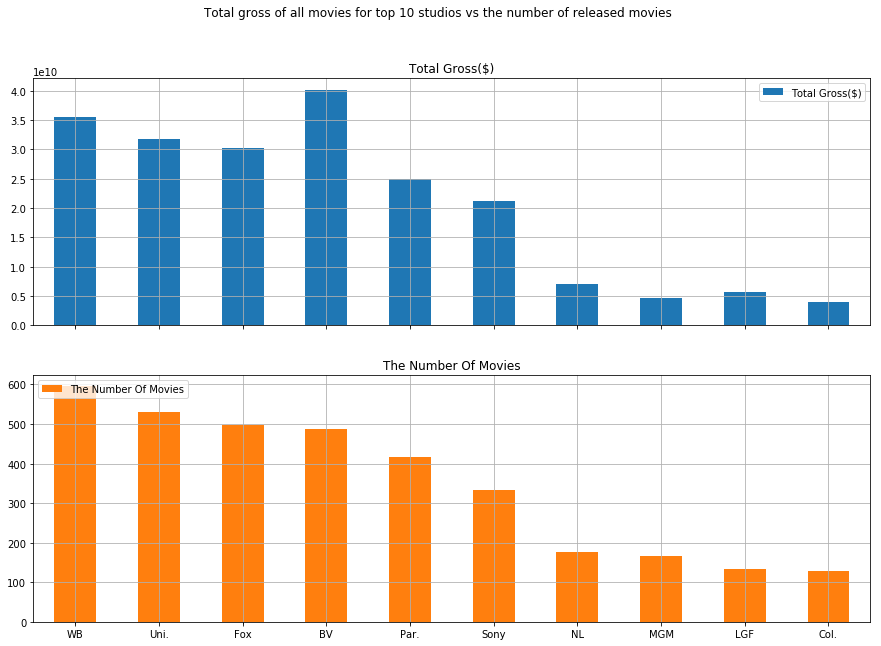

In [6]:
studio_data = data['Studio'].value_counts()

#Create a list of studios
mylist_studio = list(studio_data.index)

#Create a list of the number of released movies 
mylist_movie = list(studio_data)

#Total gross of all movies for top 10 studios vs the number of released movies
from operator import itemgetter

mylist_gross = []
for i in mylist_studio:
    df = data[data['Studio'] == i]
    mylist_gross.append(df['Total Gross($)'].sum())

df = pd.DataFrame({'Total Gross($)': mylist_gross[:10], 'The Number Of Movies': mylist_movie[:10]}, index=mylist_studio[:10])
axes = df.plot.bar(figsize=(15,10), title='Total gross of all movies for top 10 studios vs the number of released movies', rot=0, grid=True, subplots=True)
axes[1].legend(loc=2)

From the graph, we can see that although having less released movie than WB studio, BV studio still has the highest total gross among the top 10 studios.

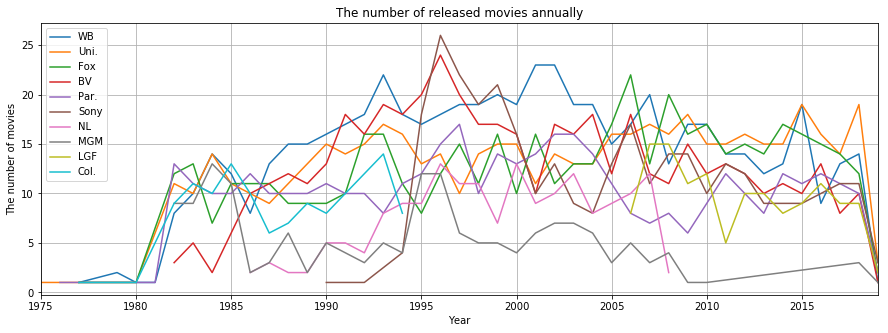

In [7]:
#How many movies each top 10 studios released annually?
df = data[data['Studio'] == 'WB']
series = df['Release Year'].value_counts().sort_index().rename('WB')
dataframe = series.to_frame()

#Create a plot for WB
ax = dataframe.plot.line(figsize=(15,5), title='The number of released movies annually', grid=True, rot=0)
ax.set(xlabel='Year', ylabel='The number of movies')

for i in mylist_studio[1:10]:
    df = data[data['Studio'] == i]
    series = df['Release Year'].value_counts().sort_index().rename(i)
    dataframe = series.to_frame()
    #Create subplot for other studios
    dataframe.plot.line(ax=ax, grid=True)

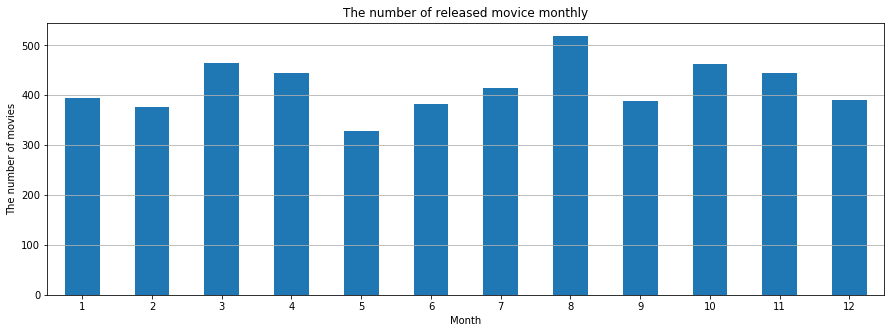

In [8]:
#In which month are the movies released the most?
series = data['Release Month'].value_counts().sort_index()

ax = series.plot.bar(figsize=(15,5), title='The number of released movice monthly', rot=0)
ax.set(xlabel='Month', ylabel='The number of movies')
ax.yaxis.grid()

From the graph, most of the movies were released in August and Christmas season.

In [9]:
# Statistic
df = pd.DataFrame({'Total Gross($)': mylist_gross, 'Number Of Movies': mylist_movie}, index=mylist_studio)

#Average total gross of a studio
print('Average total gross of an studio is:', df['Total Gross($)'].mean())

#Average gross of a movie
print('Average gross of a movie is:', df['Total Gross($)'].sum()/df['Number Of Movies'].sum())

Average total gross of an studio is: 1799946405.1619718
Average gross of a movie is: 50975745.81830873


My null hypothesis states that the amount of the opening gross of a movie in 2018 is 100 million dollars. My alternative hypothesis states the amount of the opening gross of a movie in 2018 is different than 100 million dollars.

In [10]:
data_2018 = data[(data['Release Day'] >= '2018-1-1') & (data['Release Day'] <= '2018-12-31')]
population_mean = data_2018['Opening($)'].mean()
population_std = data_2018['Opening($)'].std()
print('The population mean amount of the opening gross of a movie is:', population_mean)
print('The population standard deviation is:', population_std)

The population mean amount of the opening gross of a movie is: 18728607.06451613
The population standard deviation is: 33277325.116691146


In [11]:
#Calculate the z_scores and p_values
from scipy import stats

alpha = 0.05
test_value = 100000000
z_scores = (test_value - population_mean)/population_std
p_values = stats.norm.sf(abs(z_scores))
print('The p values is: ', p_values)
if p_values <= alpha:
    print('With the evidence at alpha =', alpha, ', we reject the null hypothesis.')
else:
    print('With the evidence at alpha =', alpha, ', we do not reject the null hypothesis.')

The p values is:  0.007298111278184938
With the evidence at alpha = 0.05 , we reject the null hypothesis.


References:

1. Pandas Documentation. (n.d.). Pandas: powerful Python data analysis toolkit. Retrieved from: https://pandas.pydata.org/pandas-docs/stable/index.html

2. Stephanie. (October 17, 2009). Support or Reject Null Hypothesis in Easy Steps. Retrieved from: https://www.statisticshowto.datasciencecentral.com/support-or-reject-null-hypothesis/

3. Farren, D. (March 12, 2015). Convert Z-score (Z-value, standard score) to p-value for normal distribution in Python. Retrieved from: https://stackoverflow.com/questions/3496656/convert-z-score-z-value-standard-score-to-p-value-for-normal-distribution-in